### 过拟合

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3,3,size=100)
X = x.reshape(-1,1)
y = 0.5 * x + 3 + np.random.normal(0,1,size=100)

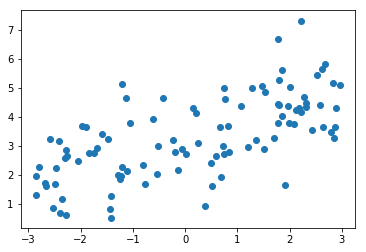

In [3]:
plt.scatter(x,y)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
np.random.seed(666)

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [8]:
def PolynomialRegression(degree):
    return Pipeline([
        ("poly",PolynomialFeatures(degree=degree)),
        ("std_reg",StandardScaler()),
        ("lin_reg",LinearRegression())
    ])

In [9]:
from sklearn.metrics import mean_squared_error

poly20_reg = PolynomialRegression(degree=20)
poly20_reg.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_reg', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [10]:
y20_predict = poly20_reg.predict(X_test)

In [11]:
mean_squared_error(y_test,y20_predict)

1.4865515111403684

In [12]:
X_plot = np.linspace(-3,3,100).reshape(100,1)
y_plot = poly20_reg.predict(X_plot)

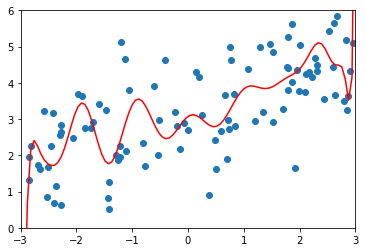

In [13]:
plt.scatter(x,y)
plt.plot(X_plot,y_plot,color="r")
plt.axis([-3,3,0,6])
plt.show()

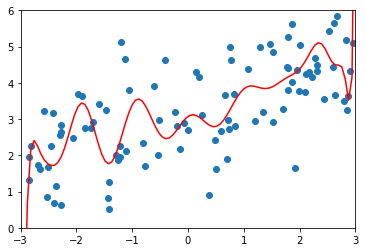

In [14]:
def plot_model(model):
    X_plot = np.linspace(-3,3,100).reshape(100,1)
    y_plot = model.predict(X_plot)
    
    plt.scatter(x,y)
    plt.plot(X_plot,y_plot,color="r")
    plt.axis([-3,3,0,6])
    plt.show()
    
plot_model(poly20_reg)

### 使用岭回归

In [15]:
from sklearn.linear_model import Ridge

In [16]:
def RidgeRegression(degree,alpha):
    return Pipeline([
        ("poly",PolynomialFeatures(degree=degree)),
        ("std_reg",StandardScaler()),
        ("Ridge_reg",Ridge(alpha=alpha))
    ])

In [17]:
ridge1_reg = RidgeRegression(degree=20,alpha = 0.0001)

ridge1_reg.fit(X_train,y_train)
y1_predict = ridge1_reg.predict(X_test)
mean_squared_error(y_test,y1_predict)

1.4325055159027258

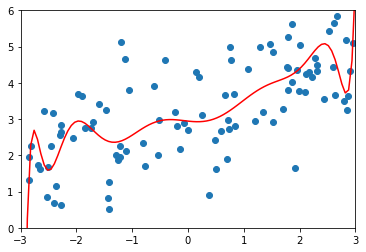

In [18]:
plot_model(ridge1_reg)

In [19]:
ridge2_reg = RidgeRegression(degree=20,alpha = 1)

ridge2_reg.fit(X_train,y_train)
y2_predict = ridge2_reg.predict(X_test)
mean_squared_error(y_test,y2_predict)

1.3774980256210592

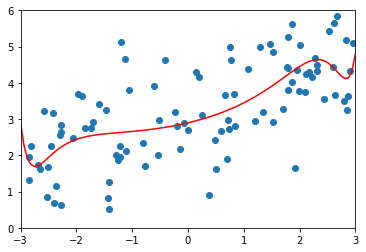

In [20]:
plot_model(ridge2_reg)

In [22]:
ridge3_reg = RidgeRegression(degree=20,alpha = 10000000)

ridge3_reg.fit(X_train,y_train)
y3_predict = ridge3_reg.predict(X_test)
mean_squared_error(y_test,y3_predict)

2.6606630594257243

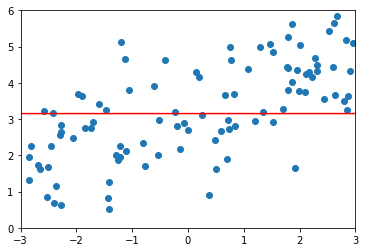

In [23]:
plot_model(ridge3_reg)